In [1]:
#import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
#to check the type of the train and test
type(xtrain)

numpy.ndarray

In [5]:
#to check shape of the train and test
xtrain.shape

(50000, 32, 32, 3)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
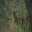

In [7]:
#look the first image in the array
xtrain[10]

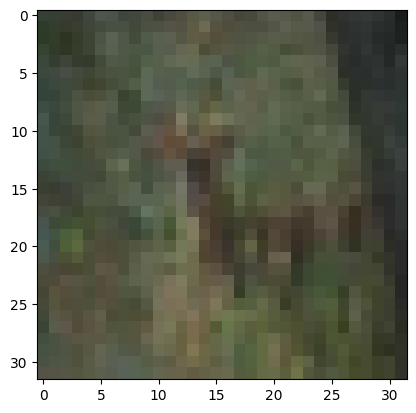

In [9]:
img0=plt.imshow(xtrain[10])

In [12]:
#get image label
lab1=ytrain[10]
print(lab1)

[4]


In [14]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [18]:
print('image class is ',classification[ytrain[10][0]])

image class is  deer


In [20]:
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
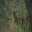

In [22]:
xtrain[10]

In [24]:
xtrain=xtrain/255
xtest=xtest/255

In [41]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Drop
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [43]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=20,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 56s 345ms/step - loss: 2.2118 - accuracy: 0.1546 - val_loss: 2.0636 - val_accuracy: 0.2316
Epoch 2/20
157/157 [==============================] - 58s 372ms/step - loss: 2.0250 - accuracy: 0.2459 - val_loss: 1.9608 - val_accuracy: 0.2772
Epoch 3/20
157/157 [==============================] - 57s 357ms/step - loss: 1.9530 - accuracy: 0.2692 - val_loss: 1.9215 - val_accuracy: 0.2829
Epoch 4/20
157/157 [==============================] - 53s 338ms/step - loss: 1.8762 - accuracy: 0.2987 - val_loss: 1.8252 - val_accuracy: 0.3188
Epoch 5/20
157/157 [==============================] - 56s 356ms/step - loss: 1.8290 - accuracy: 0.3196 - val_loss: 1.7819 - val_accuracy: 0.3333
Epoch 6/20
157/157 [==============================] - 53s 341ms/step - loss: 1.7921 - accuracy: 0.3318 - val_loss: 1.7468 - val_accuracy: 0.3492
Epoch 7/20
157/157 [==============================] - 53s 338ms/step - loss: 1.7571 - accuracy: 0.3457 - val_loss: 1.7151 - val_ac

In [33]:
deer=plt.imread('/content/index.jpg')

In [35]:
from skimage import transform

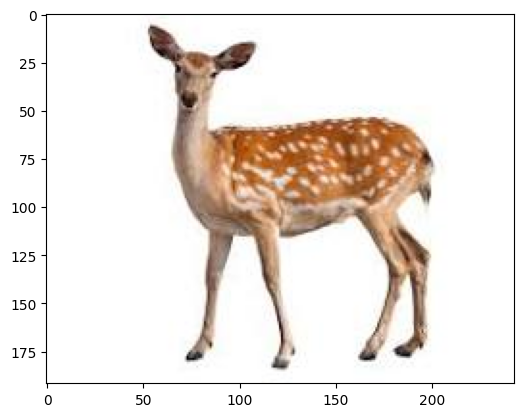

In [46]:
img=plt.imshow(deer)

In [37]:
resize=transform.resize(deer,(32,32,3))

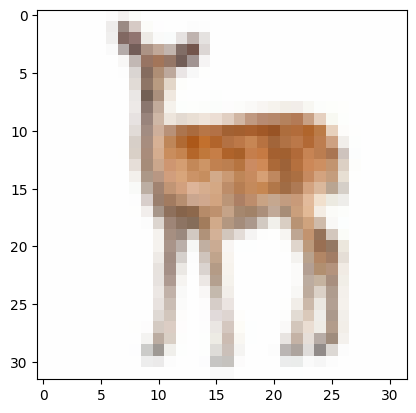

In [47]:
img=plt.imshow(resize)

In [71]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 37ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [72]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>=x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[0, 2, 3, 4, 5, 6, 7, 8, 9, 1]


In [74]:
for i in range(5):
   print(classification[list_index[i]])

airplane
bird
cat
deer
dog
